#### Week - 5. Assignment (Section C)

Here, the focus is the quantum statistical mechnaics, the harmonic and anharonic oscillator, it other words: a particle in a harmonic or an anharmonic potential

**C.**

In this section, you will adapt your programs of sections **B1** (matrix squaring) and **B2** (Path integral Monte Carlo) for the anharmonic oscilator, we no longer have an analytic solution for $\rho(x,x, \beta)$ against which we can check our results. Nevertheless, in Section **C3**, we will obtain some analytical control over our calculations.

We replace the harmonic potential<br>
pot =  x ** 2 / 2.0<br>
with a anharmonic potential<br>
pot =  x ** 2 / 2.0 + cubic * x ** 3 + quartic * x ** 4<br>

which depends on two additional parameters ('cubic' and 'quartic').

In what follows, we will always consider the case in which **cubic=-quartic**. In addition, we always consider **quartic > 0**. This condition makes sure that the potential is + infinity in the limits of **$x \rightarrow \pm \infty$**. This assures that our particle does not run away to infinity.

**C1**

Modify the matrix-squaring program in Section **B1** for the anisotropic oscillator **(we suggest you copy the content of Section B1 to a new directory, then modify)**.

To this aim,

- **Write a Python function V(x, cubic, quartic)** ("def V(x,cubic,quartic): ... ")  which returns the anharmonic potential, based on the above  definition.

- **Write a Python function rho_anharmonic_trotter**. In this function, replace 0.5 * (x ** 2 + xp ** 2) by V(x, cubic, quartic) + V(x', cubic, quartic). In rho_harmonic_trotter, there is another factor "-0.5". Make sure to keep it:  the Trotter approximation reads rho(x,x',beta) = exp(-beta V(x) / 2) rho_free(x, x', beta) exp(-beta V(x') / 2).

- As in Section **B1**, produce a plot of pi(x), obtained by normalizing the diagonal of the density matrix (see code snippet in **B1**).

- **Make sure you check the program for cubic = quartic = 0**, where it should be identical to what you obtained in Section B1.

Then use quartic = - cubic = 1.0 and: 

Run your program for beta=4, and **keep the data file** for Section **C2**. **Upload your program**.



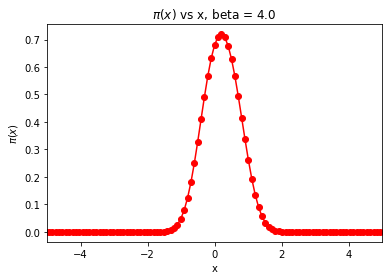

In [1]:
import math, numpy
import matplotlib.pyplot as plt
import pylab

#Defining a potential having a coefficients 'cubic' and 'quartic'
def V(x, cubic, quartic):
    return (x ** 2 / 2.0 + cubic * x ** 3 + quartic * x ** 4)

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Anharmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_anharmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * (V(x, cubic, quartic) + V(xp, cubic, quartic))) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-5)                   # initial value of beta (power of 2)
beta     = 2.0 ** 2                      # actual value of beta (power of 2)

cubic = -1.0
quartic = 1.0
rho = rho_anharmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    #print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
    Z = sum(rho[j, j] for j in range(nx + 1)) * dx
    pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]
    f = open('data_anharm_matrixsquaring_beta' + str(beta) + '.dat', 'w')
    for j in range(nx + 1):
        f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
    f.close()

#Code for reading a file with (2xn) list
def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y

filename = 'data_anharm_matrixsquaring_beta4.0.dat'
[list_x, list_y] = read_file(filename)
plt.plot(list_x, list_y,'-o',color = 'red')
plt.xlim(-5,5)
plt.xlabel('x')
plt.ylabel('$\pi(x)$')
plt.title('$\pi(x)$ vs x, beta = 4.0')
pylab.savefig('Probablity_anharm_1_beta_4.png')

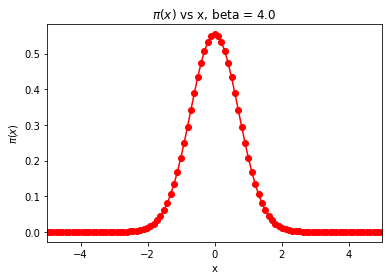

In [2]:
x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-5)                   # initial value of beta (power of 2)
beta     = 2.0 ** 2                      # actual value of beta (power of 2)

cubic = 0.0
quartic = 0.0
rho = rho_anharmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    #print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
    Z = sum(rho[j, j] for j in range(nx + 1)) * dx
    pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]
    f = open('data_anharm_matrixsquaring_beta1' + str(beta) + '.dat', 'w')
    for j in range(nx + 1):
        f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
    f.close()

#Code for reading a file with (2xn) list
def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y

filename = 'data_anharm_matrixsquaring_beta14.0.dat'
[list_x, list_y] = read_file(filename)
plt.plot(list_x, list_y,'-o',color = 'red')
plt.xlim(-5,5)
plt.xlabel('x')
plt.ylabel('$\pi(x)$')
plt.title('$\pi(x)$ vs x, beta = 4.0')
pylab.savefig('Probablity_anharm_2_beta_4.png')

**C2.**

We again suggest that you work in a new directory. <br>

- Incorporate the changes you performed in Section **C1** for the matrix-squaring program into the path-integral simulation program of Section **B2** in order to have a path-integral Monte Carlo program for the anharmonic oscillator. This program should incorporate V(x,cubic,quartic) as in Section **C1**. In the acceptance probability, the harmonic potential should be replaced by **V(x,cubic,quartic)**.<br>

- As in **B2**, add a few lines to read in the corresponding data from the matrix-squaring (make sure you are reading in the data for the anharmonic oscillator).<br>

Then:<br>

Run your modified Quantum Monte Carlo program with $\beta=4$ and $N=16$, and with quartic=1.0. Upload your program.



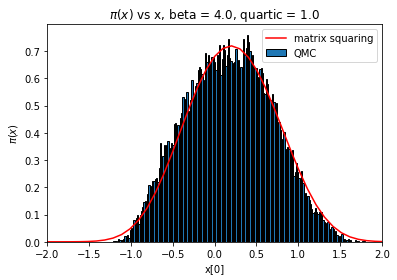

In [3]:
import math, random

def rho_free(x, x1, beta):    # free off-diagonal density matrix
    return math.exp(-(x - x1) ** 2 / (2.0 * beta)) 

quartic = 1.0
cubic = -1.0
beta = 4.0
N =16                                           # number of slices
dtau = beta / N
delta = 0.1                                      # maximum displacement on one slice
n_steps =1000000                                # number of Monte Carlo steps
x = [0.0] * N                                     # initial path
y_hist = []
for step in range(n_steps):
    k = random.randint(0, N - 1)                  # random slice
    knext, kprev = (k + 1) % N, (k - 1) % N       # next/previous slices
    x_new = x[k] + random.uniform(-delta, delta)  # new position at slice k
    
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   math.exp(-0.5 * dtau * V(x[k], cubic, quartic) ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   math.exp(-0.5 * dtau * V(x_new, cubic, quartic) ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
        if step%10 == 0:
            y_hist.append(x[0])

pylab.hist(y_hist, 200, density = 'True', stacked = 'True', ec = 'black')

#Code for reading a file with (2xn) list
def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y

filename = 'data_anharm_matrixsquaring_beta4.0.dat'
[list_x, list_y] = read_file(filename)
plt.plot(list_x, list_y, color = 'red')
plt.xlim(-2,2)
plt.xlabel('x[0]')
plt.ylabel('$\pi(x)$')
plt.legend(['matrix squaring', 'QMC'])
plt.title('$\pi(x)$ vs x, beta = 4.0, quartic = 1.0')
pylab.savefig('Probablity_anharm_QMC1_beta_4.png')

**C2 (continued)**

Upload the graphics file comparing the Quantum Monte Carlo data and the matrix-squaring data. Make sure that the graph has a title giving the parameters cubic and quartic, that axes are labeled and that there is a legend for each histogram or curve. Use pylab.xlim(.., ...), as explained in Section B2, in order to restrict the graph to the most interesting part without changing the normalization.

NB:
In this one-dimensional problem, we may compare Quantum Monte Carlo 
with Matrix squaring, but already in three dimensions, the matrix 
squaring is no longer feasible. Quantum Monte Carlo is all that remains

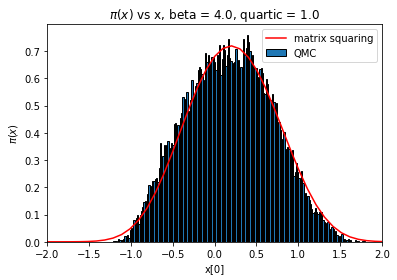

In [4]:
pylab.hist(y_hist, 200, density = 'True', stacked = 'True', ec = 'black')

#Code for reading a file with (2xn) list
def read_file(filename):
    list_x = []
    list_y = []
    with open(filename) as f:
        for line in f:
            x, y = line.split()
            list_x.append(float(x))
            list_y.append(float(y))
    f.close()
    return list_x, list_y

filename = 'data_anharm_matrixsquaring_beta4.0.dat'
[list_x, list_y] = read_file(filename)
plt.plot(list_x, list_y, color = 'red')
plt.xlim(-2,2)
plt.xlabel('x[0]')
plt.ylabel('$\pi(x)$')
plt.legend(['matrix squaring', 'QMC'])
plt.title('$\pi(x)$ vs x, beta = 4.0, quartic = 1.0')
pylab.savefig('Probablity_anharm_QMC2_beta_4.png')

**C3.**

NB: This Section is  more specialized.  The aim is to gain some analytical control over the results obtained in Section C1.

When the cubic and quartic parameters are rather small, the anharmonic potential is similar to the harmonic one. In this case, there exists a perturbative  expression for the energy levels E_n(cubic, quartic) of the anharmonic oscillator. This expression (that is too complicated for us to derive) allows us to compute the partition function \sum_n exp(-beta E_n) for small cubic and quartic (this is the meaning of the word "perturbative"), but it becomes totally wrong at 
larger values of the parameters.

Here is the code snippet which does that for us:


def Energy_pert(n, cubic, quartic):<br>
    return n + 0.5 - 15.0 / 4.0 * cubic **2 * (n ** 2 + n + 11.0 / 30.0) \ <br>
         + 3.0 / 2.0 * quartic * (n ** 2 + n + 1.0 / 2.0)<br>

def Z_pert(cubic, quartic, beta, n_max):<br>
    Z = sum(math.exp(-beta * Energy_pert(n, cubic, quartic)) for n in range(n_max + 1))<br>
    return Z<br>
    
Modify the matrix-squaring program of Section **C1** so that it allows to compute the approximate partition function, as shown in the snippet.

- Upload your modified matrix-squaring program. Run this program for quartic= - cubic = 0.001,0.01,0.1,0.2,0.3,0.4,0.5, at inverse temperature beta = 2.0. For each one of these values, compute the diagonal density matrix through matrix-squaring, and extract the partition function Z in the following way (as already done in Section B1):

Z = sum(rho[j, j] for j in range(nx + 1)) * dx

In [5]:
import math, numpy
import matplotlib.pyplot as plt
import pylab


def Energy_pert(n, cubic, quartic):
    return n + 0.5 - 15.0 / 4.0 * cubic **2 * (n ** 2 + n + 11.0 / 30.0) \
         + 3.0 / 2.0 * quartic * (n ** 2 + n + 1.0 / 2.0)

def Z_pert(cubic, quartic, beta, n_max):
    Z = sum(math.exp(-beta * Energy_pert(n, cubic, quartic)) for n in range(n_max + 1))
    return Z

nx = 20
beta = 2.0                  # actual value of beta (power of 2)

import numpy as np
quartic= np.array([0.001,0.01,0.1,0.2,0.3,0.4,0.5])
cubic= np.array([0.001,0.01,0.1,0.2,0.3,0.4,0.5])*(-1)

print("Estimation of Zpert directly:\n")
for ii in range(len(quartic)):
    Z = Z_pert(cubic[ii],quartic[ii], beta, nx)
    print('Zpert' + str(ii),Z)


Estimation of Zpert directly:

Zpert0 0.424365129707959
Zpert1 0.4150524186187612
Zpert2 0.3551514716022911
Zpert3 0.32775877165084777
Zpert4 0.327846128879344
Zpert5 0.362552298948946
Zpert6 3.699684740076945e+50


In [6]:
import math, numpy
import matplotlib.pyplot as plt
import pylab

#Defining a potential having a coefficients 'cubic' and 'quartic'
def V(x, cubic, quartic):
    return (x ** 2 / 2.0 + cubic * x ** 3 + quartic * x ** 4)

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Anharmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_anharmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * (V(x, cubic, quartic) + V(xp, cubic, quartic))) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-6)                   # initial value of beta (power of 2)
beta     = 2.0 ** 1                      # actual value of beta (power of 2)

import numpy as np
quartic1= np.array([0.001,0.01,0.1,0.2,0.3,0.4,0.5])
cubic1= np.array([0.001,0.01,0.1,0.2,0.3,0.4,0.5])*(-1)

for ii in range(len(quartic1)):
    cubic = cubic1[ii]
    #print(cubic)
    quartic = quartic1[ii]
    rho = rho_anharmonic_trotter(x, beta_tmp)  # density matrix at initial beta
    while beta_tmp < beta:
        rho = numpy.dot(rho, rho)
        rho *= dx
        beta_tmp *= 2.0
        #print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
        Z1 = sum(rho[j, j] for j in range(nx + 1)) * dx
    print('Z_simulation' + str(ii), Z1)


Z_simulation0 0.4243761801589153
Z_simulation1 0.4243761801589153
Z_simulation2 0.4243761801589153
Z_simulation3 0.4243761801589153
Z_simulation4 0.4243761801589153
Z_simulation5 0.4243761801589153
Z_simulation6 0.4243761801589153


In [7]:
import numpy as np
quartic= np.array([0.001,0.01,0.1,0.2,0.3,0.4,0.5])
cubic= np.array([0.001,0.01,0.1,0.2,0.3,0.4,0.5])*(-1)
n = 20
for ii in range(len(quartic)):
    Z = Z_pert(cubic[ii],quartic[ii], beta, n)
    print(Z)

0.424365129707959
0.4150524186187612
0.3551514716022911
0.32775877165084777
0.327846128879344
0.362552298948946
3.699684740076945e+50


In [8]:
#Defining a potential having a coefficients 'cubic' and 'quartic'
def V(x, cubic, quartic):
    return (x ** 2 / 2.0 + cubic * x ** 3 + quartic * x ** 4)

# Free off-diagonal density matrix
def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

# Anharmonic density matrix in the Trotter approximation (returns the full matrix)
def rho_anharmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) * \
                         numpy.exp(-0.5 * beta * (V(x, cubic, quartic) + V(xp, cubic, quartic))) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]
beta_tmp = 2.0 ** (-5)                   # initial value of beta (power of 2)
beta     = 2.0 ** 1                     # actual value of beta (power of 2)

cubic = -1.0
quartic = 1.0

rho = rho_anharmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    #print ('beta: %s -> %s' % (beta_tmp / 2.0, beta_tmp))
    Z = sum(rho[j, j] for j in range(nx + 1)) * dx
    pi_of_x = [rho[j, j] / Z for j in range(nx + 1)]
    f = open('data_anharm_matrixsquaring_beta1' + str(beta) + '.dat', 'w')
    for j in range(nx + 1):
        f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
    f.close()
    
Z = sum(rho[j, j] for j in range(nx + 1)) * dx